# Potfolio Project

Andrew Dzik

DATA1201 Final Exam

12/07/2023

Stock Market Analyses

# Question

Stocks to any normal person seem like chaotic and scary things that can cause people to either gain or lose the money that they put at risk. Some people are typically scared off by this and resort to keeping their money rather than putting their money into the stock market where it could potentially be lost. 

However, stock market professionals recognized that they could use their knowledge of the market to help people grow their money on their behalf. Different professionals have of course, different opinions. Usually, these professionals have their stocks compared to what are called stock market indices. 

A stock market index is a portfolio of hypothetical stocks that represent a segment of the financial market. Market analysts use these indices to gauge overall market behavior. If these indices drop rapidly over a very short time, then it sends red flags up of a potential market crash. If they go up over a long period of time, then they show that things are doing well. 

What's useful about the Stock Market Indices, is that people can actually buy them. By purchasing a Stock Market Index, an investor puts their money into a well distributed stock that reflects a very large portion of the successful businesses on the market. 

There are quite a few stock market indicies out there. Some people might want to know which ones they should be buying. Another question is how much better are these stock market indices compared to all the other types of stock? 

# What Stock Market Index has performed the best over the last 2 decades? Are Indices worth buying over other types of stocks?  

Datset originally contained values for last 3 decades, manually adjusted to only include last 2.

Source: https://www.kaggle.com/datasets/asimislam/30-yrs-stock-market-data 

# Getting The Data

In [19]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [20]:
#Read CSV Data

stocks = Table().read_table('stock_market.csv')

stocks

Date,Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),Cocoa (CC=F),Coffee (KC=F),Corn (ZC=F),Cotton (CT=F),Live Cattle (LE=F),Orange Juice (OJ=F),Soybeans (ZS=F),Sugar (SB=F),Wheat (ZW=F),Ethanol (EH=F),Heating Oil (HO=F),Natural Gas (NG=F),Crude Oil-Brent (BZ=F),Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Palladium (PA=F),Platinum (PL=F),Silver (SI=F),Treasury Yield 5 Years (^FVX),Treasury Bill 13 Week (^IRX),Treasury Yield 10 Years (^TNX),Treasury Yield 30 Years (^TYX)
2003-01-02,8607.52,1384.85,909.03,5146,392.58,25.39,3105.04,4009.5,9365.52,2099,61.65,237,52.01,79.4,nan,584.5,7.69,328.75,nan,0.8809,5.251,nan,31.85,0.714,346.1,239.8,610,4.812,2.979,1.19,4.032,4.957
2003-01-03,8601.69,1387.08,908.59,5148.45,390.31,24.68,3092.94,4005,9583.85,2145,61.25,236,51.62,79.975,nan,582.25,7.4,330.5,nan,0.9182,5.344,nan,33.08,0.7265,351.2,241.55,610.5,4.892,2.989,1.192,4.038,4.954
2003-01-06,8773.57,1421.32,929.01,5255.39,397,24.91,3157.25,4001.4,9665.96,2191,63.25,235.75,51.08,79.625,nan,582,7.61,331.5,nan,0.8879,4.935,nan,32.1,0.7345,351.7,244.95,616.8,4.899,3.043,1.182,4.066,4.978
2003-01-07,8740.59,1431.57,922.93,5186.92,393.95,25.13,3112.77,3957.4,9652.4,2189,63.5,240,51.17,79.675,nan,585.25,7.55,327.75,nan,0.8488,5.127,nan,31.08,0.7315,347.3,241.5,612.4,4.804,2.991,1.172,4.025,4.961
2003-01-08,8595.31,1401.07,909.93,5124.19,389.07,25.53,2993,3924.8,9688.21,2089,62.85,245.25,51.74,79.6,nan,589.5,7.74,337,nan,0.8321,5.161,nan,30.56,0.742,353.9,259,618.1,4.856,2.947,1.167,3.981,4.921
2003-01-09,8776.18,1438.46,927.57,5210.34,395.94,24.25,3037.68,3934,9675.41,2160,62.7,243.5,51.06,79.875,nan,586.5,7.59,329,nan,0.875,5.304,nan,31.99,0.746,353.3,263.65,618.3,4.844,3.144,1.177,4.148,5.061
2003-01-10,8784.89,1447.72,927.57,5209.8,396.44,24.32,3037.33,3974.1,9721.5,2155,65.05,234.75,51.4,79.85,nan,564.75,7.67,319.25,nan,0.8653,5.143,nan,31.68,0.74,354.5,269.3,623.3,4.859,3.146,1.172,4.152,5.056
2003-01-13,8785.98,1446.04,926.26,5209.21,396.18,24.9,3060.65,3948.3,9834.08,2077,64.9,230.5,50.91,79.525,nan,560.25,7.67,311.25,nan,0.8838,5.251,nan,32.26,0.748,354.7,255.55,619.2,4.828,3.103,1.172,4.128,5.028
2003-01-14,8842.62,1460.99,931.66,5233.66,398.45,24.57,3098.72,3945.6,9796.31,2064,64.9,231.25,51.3,79.225,nan,555,7.66,314.25,nan,0.8916,5.107,nan,32.37,0.756,352,250,619.2,4.753,3.043,1.172,4.085,4.998
2003-01-15,8723.18,1438.8,918.22,5171.45,395.53,25.51,3049.4,3887.8,9873.49,2077,65.95,231.25,51.46,77.725,nan,549.75,7.7,312.75,nan,0.9086,5.43,nan,33.2,0.761,350.7,245.4,618.1,4.768,3.039,1.167,4.072,4.977


In [21]:
#To determine the best stock we will calculate % change since the starting year of 2003
first_last = stocks.take(0, 5169)
first_last

Date,Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),Cocoa (CC=F),Coffee (KC=F),Corn (ZC=F),Cotton (CT=F),Live Cattle (LE=F),Orange Juice (OJ=F),Soybeans (ZS=F),Sugar (SB=F),Wheat (ZW=F),Ethanol (EH=F),Heating Oil (HO=F),Natural Gas (NG=F),Crude Oil-Brent (BZ=F),Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Palladium (PA=F),Platinum (PL=F),Silver (SI=F),Treasury Yield 5 Years (^FVX),Treasury Bill 13 Week (^IRX),Treasury Yield 10 Years (^TNX),Treasury Yield 30 Years (^TYX)
2003-01-02,8607.52,1384.85,909.03,5146,392.58,25.39,3105.04,4009.5,9365.52,2099,61.65,237,52.01,79.4,nan,584.5,7.69,328.75,nan,0.8809,5.251,nan,31.85,0.714,346.1,239.8,610,4.812,2.979,1.19,4.032,4.957
2023-01-03,33136.4,10387,3824.14,15154.5,1750.73,22.9,14181.7,7554.1,20145.3,2572,166.3,670.5,83.14,156.85,203.7,1487.25,19.7,775.5,2.161,3.0865,3.988,82.1,76.93,3.766,1839.7,1684.2,1082,24.059,3.945,4.255,3.793,3.893


In [22]:
#We will also drop the date and column to preform calculations on the rest of our data. 
first_last = first_last.drop('Date')
first_last

Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),Cocoa (CC=F),Coffee (KC=F),Corn (ZC=F),Cotton (CT=F),Live Cattle (LE=F),Orange Juice (OJ=F),Soybeans (ZS=F),Sugar (SB=F),Wheat (ZW=F),Ethanol (EH=F),Heating Oil (HO=F),Natural Gas (NG=F),Crude Oil-Brent (BZ=F),Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Palladium (PA=F),Platinum (PL=F),Silver (SI=F),Treasury Yield 5 Years (^FVX),Treasury Bill 13 Week (^IRX),Treasury Yield 10 Years (^TNX),Treasury Yield 30 Years (^TYX)
8607.52,1384.85,909.03,5146,392.58,25.39,3105.04,4009.5,9365.52,2099,61.65,237,52.01,79.4,nan,584.5,7.69,328.75,nan,0.8809,5.251,nan,31.85,0.714,346.1,239.8,610,4.812,2.979,1.19,4.032,4.957
33136.4,10387,3824.14,15154.5,1750.73,22.9,14181.7,7554.1,20145.3,2572,166.3,670.5,83.14,156.85,203.7,1487.25,19.7,775.5,2.161,3.0865,3.988,82.1,76.93,3.766,1839.7,1684.2,1082,24.059,3.945,4.255,3.793,3.893


In [23]:
# Some columns still lack data, these will be removed. 
first_last = first_last.drop('Orange Juice (OJ=F)', 'Ethanol (EH=F)', 'Crude Oil-Brent (BZ=F)')

In [24]:
# Create two arrays of the data, one of each row. 
original = []
latest = []
labels = first_last.labels

for i in range(first_last.num_columns):
    original.append(first_last[i][0].astype(float))
    latest.append(first_last[i][1].astype(float))

In [25]:
# change as list of the % change values. 
# Divide latest by 1.65 for the rate of inflation over the 20 year gap to find real % growth.
change = []
for i in range(stocks.take(0, 5169, 5170).drop('Date', 'Orange Juice (OJ=F)', 'Ethanol (EH=F)', 'Crude Oil-Brent (BZ=F)').num_columns):
    change.append((((latest[i]/1.65) / original[i])-1)*100)

In [26]:
#In order to use barh, we need to make another table with the row as a column.
visData = Table()
visData = visData.with_columns(
    'Stock', labels, 
    '% Change', change
)
visData.show(29)

Stock,% Change
Dow Jones (^DJI),133.315
Nasdaq (^IXIC),354.572
S&P500 (^GSPC),154.96
NYSE Composite (^NYA),78.4787
Russell 2000 (^RUT),170.276
CBOE Volitility (^VIX),-45.3376
DAX Index (^GDAXI),176.806
FTSE 100 (^FTSE),14.1849
Hang Seng Index (^HSI),30.364
Cocoa (CC=F),-25.7366


In [27]:
visIndicies = visData.take(0,1,2,3,4,5,6,7,8).sort('% Change', descending=True)
visIndicies.show(9)

visResources = visData.take(9,10,11,12,13,14,15,16,17,18,19).sort('% Change', descending=True)
visResources.show(11)

visMetals = visData.take(20,21,22,23,24).sort('% Change', descending=True)
visMetals.show(5)

visTreasuries = visData.take(25,26,27,28).sort('% Change', descending=True)
visTreasuries.show(4)

Stock,% Change
Nasdaq (^IXIC),354.572
DAX Index (^GDAXI),176.806
Russell 2000 (^RUT),170.276
S&P500 (^GSPC),154.96
Dow Jones (^DJI),133.315
NYSE Composite (^NYA),78.4787
Hang Seng Index (^HSI),30.364
FTSE 100 (^FTSE),14.1849
CBOE Volitility (^VIX),-45.3376


Stock,% Change
Heating Oil (HO=F),112.352
Corn (ZC=F),71.4614
Coffee (KC=F),63.484
Sugar (SB=F),55.2587
Soybeans (ZS=F),54.2111
Crude Oil-WTI (CL=F),46.3869
Wheat (ZW=F),42.9658
Live Cattle (LE=F),19.7237
Cotton (CT=F),-3.11886
Cocoa (CC=F),-25.7366


Stock,% Change
Palladium (PA=F),325.658
Gold (GC=F),222.152
Copper (HG=F),219.667
Silver (SI=F),203.018
Platinum (PL=F),7.50124


Stock,% Change
Treasury Bill 13 Week (^IRX),116.705
Treasury Yield 5 Years (^FVX),-19.7412
Treasury Yield 10 Years (^TNX),-42.9864
Treasury Yield 30 Years (^TYX),-52.4028


In [28]:
visData = visData.sort('% Change', descending=True)
visData.show(29)

Stock,% Change
Nasdaq (^IXIC),354.572
Palladium (PA=F),325.658
Gold (GC=F),222.152
Copper (HG=F),219.667
Silver (SI=F),203.018
DAX Index (^GDAXI),176.806
Russell 2000 (^RUT),170.276
S&P500 (^GSPC),154.96
Dow Jones (^DJI),133.315
Treasury Bill 13 Week (^IRX),116.705


# Exploring The Data

After looking at percent change, it's interesting to see that there are a lot of precious metals that went up in price in those few years. The only underpreforming precious metal being platinum. Most of the stock market indicies preformed very well

### Comparisons to the US Dollar

One curiosity that arose as I was looking over this data was how these stocks preformed in comparison to the US dollar. How much exactly did the US dollar experience in percent change from 2003 to 2023? The US dollar in 2003, according to the US Federal Buerau of Labor Statistics, has the same buying power as 1.65$ in today's dollars. This means that the US dollar experienced a change of approximately ((1.65/1)-1)*100 = 65 percent in that same 20 year gap. 

Because our table accounts for the inflation of the US dollar over that time period. We are looking at the real percent change over that time period, not the nominal. This means that any stock above 0 percent beat inflation and anything below it did not. 

### Riskiness
Another factor when looking at the data is determining how these stocks preformed. We want to look at not just how well the stocks preformed in the long-term, but also how well they prefromed during recessions. Within this 20 year gap there were two market crashes, one in 2008 and another in 2020. These recessions could severely affect the current price of specific stocks. Another question that should be investigated in the future is how does the preformance of these stocks compare immediately after a recession? 

### The Penny
Pennies made prior to 1982 were composed of 95 percent copper and 5 percent zinc. Because of the increase in the price of copper, the resources that pennies were made of were actually more than the penny itself. Although it is illegal to melt down pennies, the govenment decided to change the materials that the penny was made from to something cheaper. The result was the modern penny which is made of 2.5 percent copper and 97.5 percent zinc. However, the price of zinc has also been increasing over the years. So another question to pose for further research is how has the price of the resources of a penny changed in relation to the penny's printed value of one cent? 

This will be useful because if the US ever abolishes the penny, they will likely allow the pennies to be melted down into their raw components. Some investors will want to buy up pennies and hold onto them long-term to reap the potential value of these pennies. 

# Results / Data Visualization

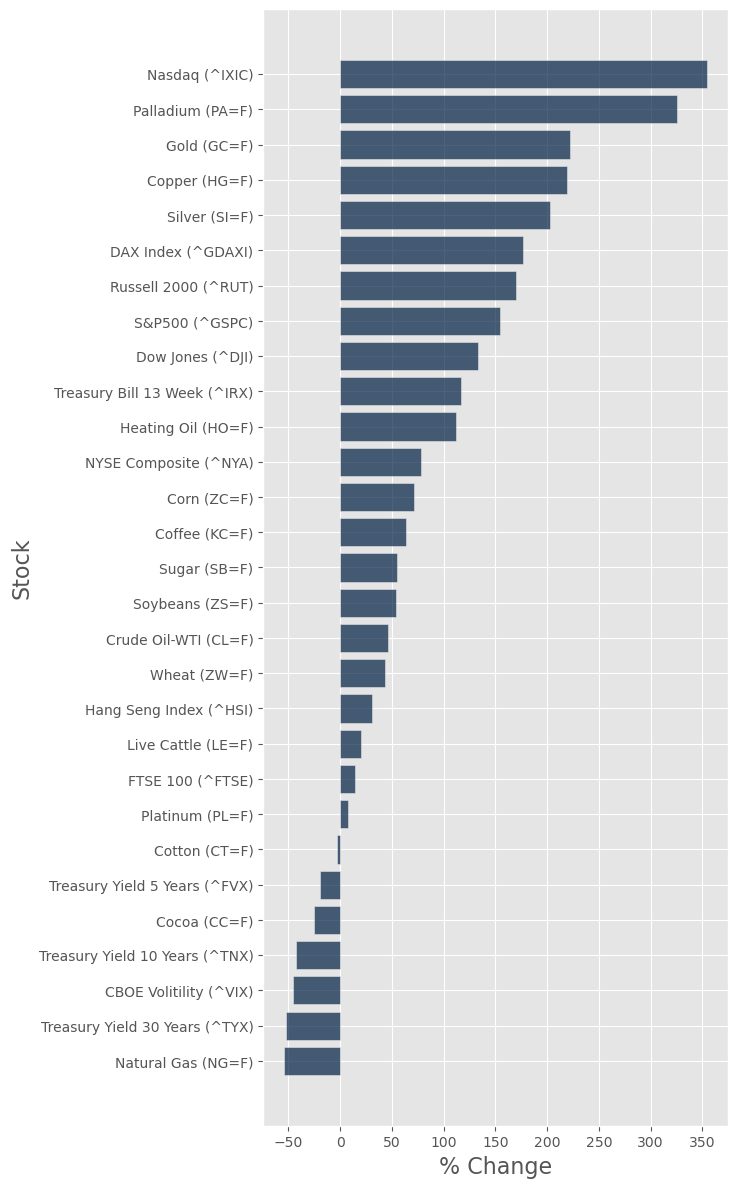

In [29]:
#Note that values that experienced 0% change did not go up or down relative to their original value.  
visData.barh('Stock')

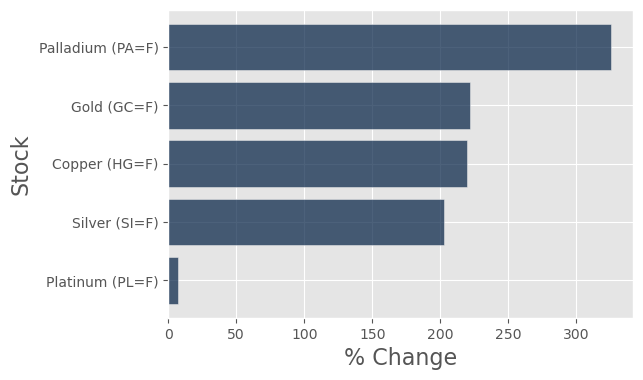

In [30]:
visMetals.barh('Stock')

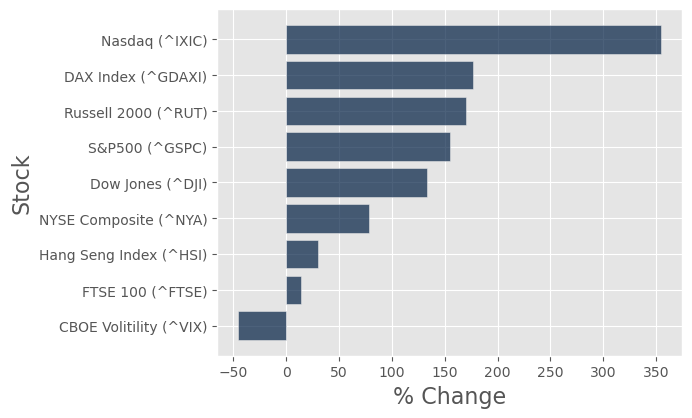

In [31]:
visIndicies.barh('Stock')

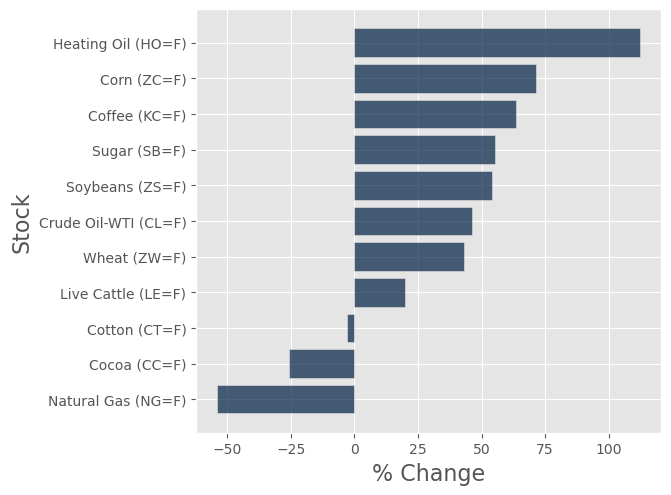

In [32]:
visResources.barh('Stock')

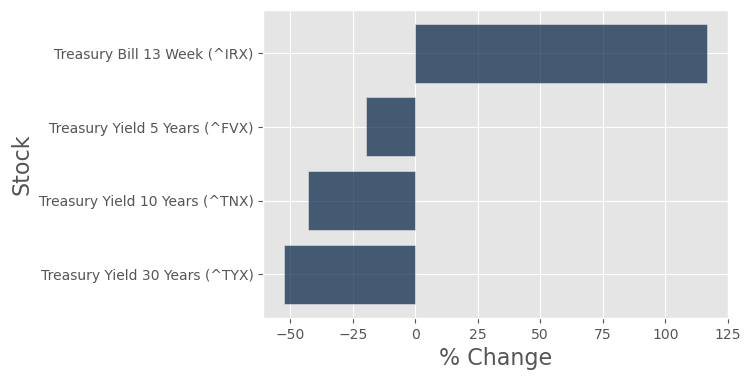

In [33]:
visTreasuries.barh('Stock')

# Conclusion

To answer the original question(s): The stock market index that generated the most revenue from 2003-2023 was the Nasdaq which accrued a 354% change since 2003. Most Stock Indicies on average do not preform as well as most metals long-term, however, they preform better than most resources. 

I think the results of answering our original question brought up more questions than it answered. There is a lot more investigation that can be done with this data. One thing that should be explored is why the Nasdaq preformed so well and what stocks it is made up of that caused such a substantial increase over the past two decades. 

Right now, it seems that Stock Indicies and Metals have the best long-term growth. More data on how volitile that data is and how they preform during recessions should be taken note of in future research. 